In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def func(T, Gamma_inf, Ta):
    return Gamma_inf * np.exp(-Ta/T)

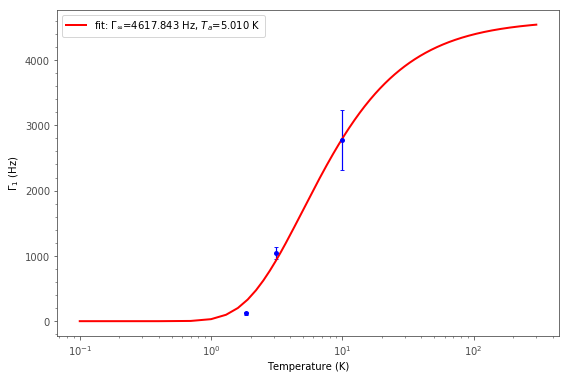

Using laser voltage:  0.07 V
Using LO_freq:  2.81 GHz
Using target_freq:  2.78469 GHz
Using power:  -1 dBm
invoke_settings:
  False
controlled_variable:
  [0.00000000e+00 1.50753769e-08 3.01507538e-08 4.52261307e-08
 6.03015075e-08 7.53768844e-08 9.04522613e-08 1.05527638e-07
 1.20603015e-07 1.35678392e-07 1.50753769e-07 1.65829146e-07
 1.80904523e-07 1.95979899e-07 2.11055276e-07 2.26130653e-07
 2.41206030e-07 2.56281407e-07 2.71356784e-07 2.86432161e-07
 3.01507538e-07 3.16582915e-07 3.31658291e-07 3.46733668e-07
 3.61809045e-07 3.76884422e-07 3.91959799e-07 4.07035176e-07
 4.22110553e-07 4.37185930e-07 4.52261307e-07 4.67336683e-07
 4.82412060e-07 4.97487437e-07 5.12562814e-07 5.27638191e-07
 5.42713568e-07 5.57788945e-07 5.72864322e-07 5.87939698e-07
 6.03015075e-07 6.18090452e-07 6.33165829e-07 6.48241206e-07
 6.63316583e-07 6.78391960e-07 6.93467337e-07 7.08542714e-07
 7.23618090e-07 7.38693467e-07 7.53768844e-07 7.68844221e-07
 7.83919598e-07 7.98994975e-07 8.14070352e-07 8.2914

Save_tag:  Rabi_A-T17-12_1.9K_0mT_Bnv_OOC
Using laser voltage:  0.07 V
Using LO_freq:  2.81 GHz
Using target_freq:  2.78469 GHz
Using power:  -1 dBm
invoke_settings:
  False
controlled_variable:
  [1.0e-07 2.0e-07 3.0e-07 4.0e-07 5.0e-07 6.0e-07 7.0e-07 8.0e-07 9.0e-07
 1.0e-06 1.1e-06 1.2e-06 1.3e-06 1.4e-06 1.5e-06 1.6e-06 1.7e-06 1.8e-06
 1.9e-06 2.0e-06 2.1e-06 2.2e-06 2.3e-06 2.4e-06 2.5e-06 2.6e-06 2.7e-06
 2.8e-06 2.9e-06 3.0e-06 3.1e-06 3.2e-06 3.3e-06 3.4e-06 3.5e-06 3.6e-06
 3.7e-06 3.8e-06 3.9e-06 4.0e-06 4.1e-06 4.2e-06 4.3e-06 4.4e-06 4.5e-06
 4.6e-06 4.7e-06 4.8e-06 4.9e-06 5.0e-06]
number_of_lasers:
  100
laser_ignore_list:
  []
alternating:
  True
units:
  ('s', 'arb. u.')
labels:
  ['Tau', 'Signal']
Save_tag:  Hecho-alt-phased_A-T17-12_1.9K_0mT_Bnv_OOC_with_leeway
Using laser voltage:  0.07 V
Using LO_freq:  2.81 GHz
Using target_freq:  2.78469 GHz
Using power:  -1 dBm
invoke_settings:
  False
controlled_variable:
  [1.0e-07 2.0e-07 3.0e-07 4.0e-07 5.0e-07 6.0e-07 7.0e

In [27]:
temp_arr = np.array([1.85, 3.1, 10]) #Temp in K
T1_arr = np.array([8.3, 0.96, 0.36])*1e-3 #T1 in ms
err = np.array([1.6, 0.08, 0.06])*1e-3
gamma_err = 1/(T1_arr**2)*err

plt.errorbar(x=temp_arr, y=1/T1_arr,
                     yerr=gamma_err, fmt='o', color='blue',
                     capsize=2, capthick=0.9,
                     elinewidth=1.2)

popt, pcov = curve_fit(func,temp_arr, 1/T1_arr)
temp = np.linspace(0.1,300,1000)
plt.plot(temp, func(temp, *popt), 'r-',
         label='fit: $\Gamma_\infty$=%5.3f Hz, $T_a$=%5.3f K' % tuple(popt))


# plt.yscale('log')
plt.xscale('log')
plt.xlabel('Temperature (K)')
plt.ylabel('$\Gamma_1$ (Hz)')
plt.legend()

plt.show()